# **Appendix A: Python Code for Scenario 1 (Full Preprocessing)**

**Description:** This script contains the complete Python code for the analytical pipeline applied to the dataset with **both outlier capping and feature selection**. This represents the "best practice" scenario with the most extensive data preparation.

#**Step 1: Setup and Data Loading**

##**1.1. Import Libraries**

In [ ]:
# --- Core Libraries for data handling and visualization ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scikit-learn for Preprocessing, Models, and Evaluation ---
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- Feature Selection ---
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor # Also used for feature importance

# --- Machine Learning Models ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# --- Keras / TensorFlow for ANN ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- Display Settings ---
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print(f"TensorFlow Version: {tf.__version__}")
print(f"XGBoost Version: {xgb.__version__}")



TensorFlow Version: 2.18.0
XGBoost Version: 3.0.2


#**Step 2: Exploratory Data Analysis (EDA)**

##**2.1. Connect Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/Research/'

##**2.2. Combine 8 Wells' Data**

In [ ]:
# --- Read each file and ADD THE 'WELL' IDENTIFIER ---
print("Reading files and adding 'WELL' identifier...")
df_well_1 = pd.read_excel(folder_path + 'well 1.xlsx')
df_well_1['WELL'] = 'Well_1'

df_well_2 = pd.read_excel(folder_path + 'well 2.xlsx')
df_well_2['WELL'] = 'Well_2'

df_well_3 = pd.read_excel(folder_path + 'well 3.xlsx')
df_well_3['WELL'] = 'Well_3'

df_well_4 = pd.read_excel(folder_path + 'well 4.xlsx')
df_well_4['WELL'] = 'Well_4'

df_well_5 = pd.read_excel(folder_path + 'well 5.xlsx')
df_well_5['WELL'] = 'Well_5'

df_well_6 = pd.read_excel(folder_path + 'well 6.xlsx')
df_well_6['WELL'] = 'Well_6'

df_well_7 = pd.read_excel(folder_path + 'well 7.xlsx')
df_well_7['WELL'] = 'Well_7'

df_well_8 = pd.read_excel(folder_path + 'well 8.xlsx')
df_well_8['WELL'] = 'Well_8'

# --- Concatenate all DataFrames ---
# The list of dataframes to combine
all_dfs = [df_well_1, df_well_2, df_well_3, df_well_4,
           df_well_5, df_well_6, df_well_7, df_well_8]

# Combine them into one master dataframe
df = pd.concat(all_dfs, ignore_index=True)

# Drop the unnamed index column if it exists from Excel export
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("\nData loaded and combined successfully.")
print("Shape of the combined DataFrame:", df.shape)

print("\n--- First 5 rows of combined data ---")
print(df.head())

print("\n--- Last 5 rows of combined data (to check if final well loaded) ---")
print(df.tail())

print("\n--- Sanity Check: Count of rows per well ---")
print(df['WELL'].value_counts().sort_index())

Reading files and adding 'WELL' identifier...

Data loaded and combined successfully.
Shape of the combined DataFrame: (11494, 11)

--- First 5 rows of combined data ---
     DEPTH       GR    RHOB      Vp       Vsh  Caliper  Porosity  Resistivity  \
0  22.0024  57.3820  1.4506  1.4614  0.033808  11.4844   66.1596       0.7881   
1  22.1548  58.0070  1.4506  1.4594  0.044766  11.4844   66.1591       0.7751   
2  22.3072  59.1046  1.4506  1.4577  0.064012  11.4844   66.1585       0.7798   
3  22.4596  59.2124  1.4506  1.4567  0.065902  11.4844   66.1581       0.7711   
4  22.6120  59.8294  1.4506  1.4564  0.076721  11.4844   66.1575       0.7446   

        Stress      PP    WELL  
0  312783.4781  1609.0  Well_1  
1  314949.9782  1609.0  Well_1  
2  317116.4783  1609.0  Well_1  
3  319282.9784  1609.0  Well_1  
4  321449.4786  1609.0  Well_1  

--- Last 5 rows of combined data (to check if final well loaded) ---
          DEPTH        GR    RHOB      Vp       Vsh  Caliper  Porosity  \
1

##**2.3. Initial Inspection & Missing Values**

In [ ]:
print("--- 2.1. Initial Inspection & Missing Values ---")
print("\nDataset Information:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values and report the percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'count': missing_values, 'percentage': missing_percentage})
print("\nMissing Values Analysis:")
print(missing_df[missing_df['count'] > 0])
# If there were missing values, you would handle them here. For example:
# df['Vsh'].fillna(df['Vsh'].median(), inplace=True)

--- 2.1. Initial Inspection & Missing Values ---

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11494 entries, 0 to 11493
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEPTH        11494 non-null  float64
 1   GR           11494 non-null  float64
 2   RHOB         11494 non-null  float64
 3   Vp           11494 non-null  float64
 4   Vsh          11494 non-null  float64
 5   Caliper      11494 non-null  float64
 6   Porosity     11494 non-null  float64
 7   Resistivity  11494 non-null  float64
 8   Stress       11494 non-null  float64
 9   PP           11494 non-null  float64
 10  WELL         11494 non-null  object 
dtypes: float64(10), object(1)
memory usage: 987.9+ KB

Statistical Summary:
              DEPTH            GR          RHOB            Vp           Vsh  \
count  11494.000000  11494.000000  11494.000000  11494.000000  11494.000000   
mean     139.708824     92.087422      

##**2.4. Outlier Detections & Treatment**


--- 2.2. Outlier Detection ---


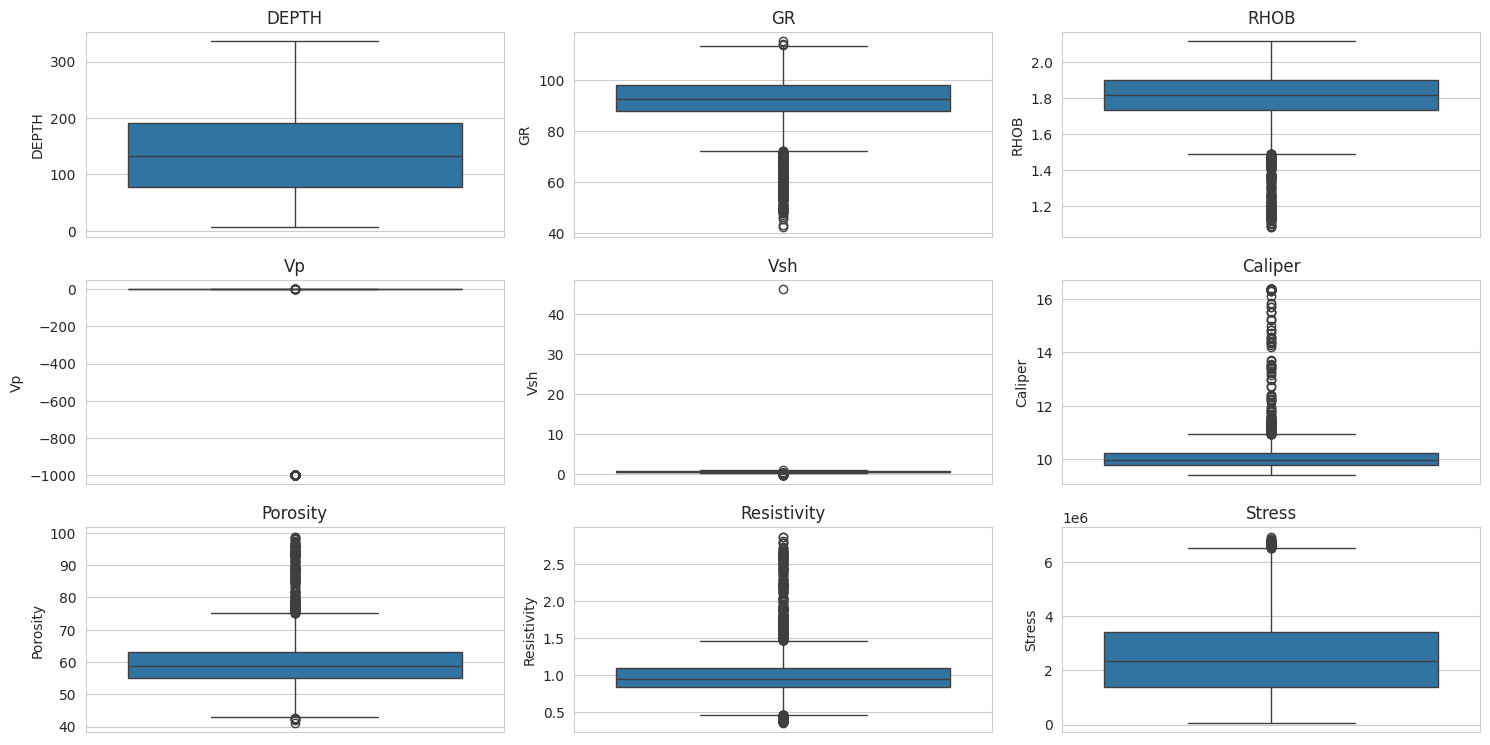


Potential outliers identified by IQR method:
Feature 'GR': 358 outliers found.
Feature 'RHOB': 242 outliers found.
Feature 'Vp': 332 outliers found.
Feature 'Vsh': 321 outliers found.
Feature 'Caliper': 399 outliers found.
Feature 'Porosity': 212 outliers found.
Feature 'Resistivity': 574 outliers found.
Feature 'Stress': 81 outliers found.


In [ ]:
print("\n--- 2.2. Outlier Detection ---")
# Exclude the 'WELL' column from features as it's a categorical variable
features = df.drop(['PP', 'WELL'], axis=1).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1) # Changed from 3, 3 to 4, 3
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Function to find outliers using IQR
def find_outliers_iqr(data_col):
    Q1 = data_col.quantile(0.25)
    Q3 = data_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_col[(data_col < lower_bound) | (data_col > upper_bound)]
    return outliers

print("\nPotential outliers identified by IQR method:")
for col in features:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Feature '{col}': {len(outliers)} outliers found.")




##**2.4.1. Capping (winsorizing)**

--- Applying Targeted Capping to: ['Vsh', 'GR'] ---

--- Statistical Summary BEFORE Capping ---
              DEPTH            GR          RHOB            Vp           Vsh  \
count  11494.000000  11494.000000  11494.000000  11494.000000  11494.000000   
mean     139.708824     92.087422      1.805392    -25.703265      0.661127   
std       74.660054      8.951782      0.135371    162.894928      0.451688   
min        5.948800     42.267500      1.082400   -999.250000     -0.162116   
25%       78.177400     87.600575      1.737000      1.511500      0.575324   
50%      132.923800     92.628000      1.816700      1.537000      0.672497   
75%      191.025100     97.888425      1.900200      1.580200      0.757985   
max      335.882800    114.995600      2.117400      1.724800     46.208200   

            Caliper      Porosity   Resistivity        Stress  
count  11494.000000  11494.000000  11494.000000  1.149400e+04  
mean      10.091069     59.443962      0.987094  2.535401e+06  


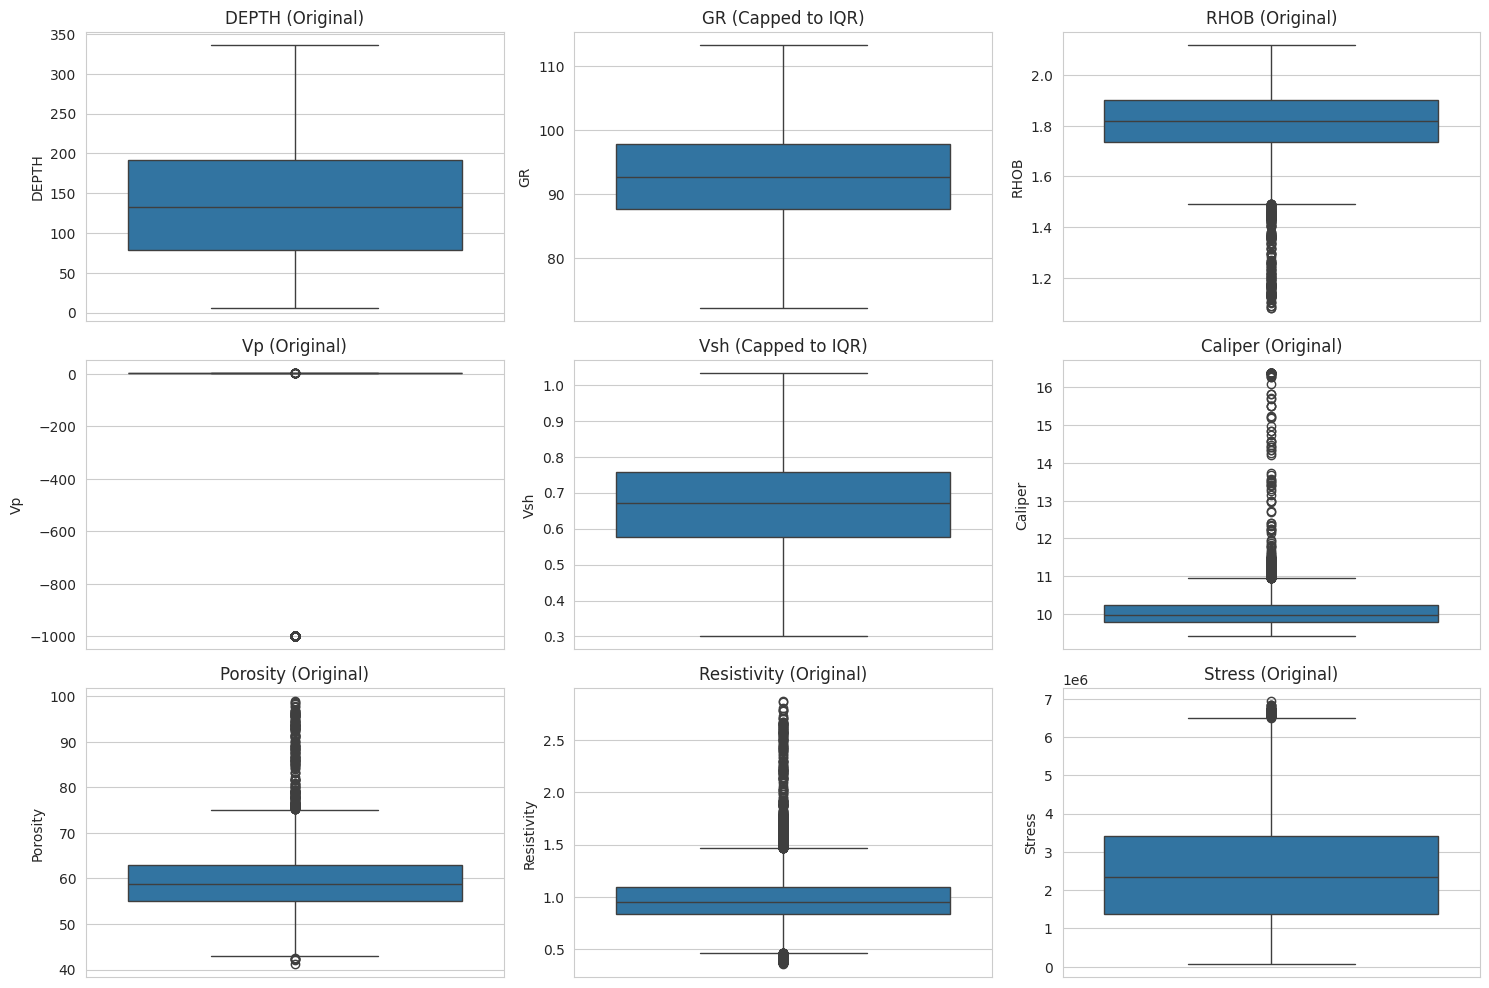


DataFrame has been updated with values capped ONLY for Vsh and GR.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a fresh copy to work with
df_capped_targeted = df.copy()

# --- Define ONLY the features we want to cap ---
# This is the key change in the methodology.
features_to_cap = ['Vsh', 'GR']

print(f"--- Applying Targeted Capping to: {features_to_cap} ---")

# --- Statistical Summary BEFORE Capping (for all features) ---
all_numerical_features = df.select_dtypes(include=np.number).columns.drop('PP')
print("\n--- Statistical Summary BEFORE Capping ---")
print(df_capped_targeted[all_numerical_features].describe())


# --- Loop through ONLY the specified features and apply IQR-based capping ---
for col in features_to_cap:
    # Calculate Q1, Q3, and IQR
    Q1 = df_capped_targeted[col].quantile(0.25)
    Q3 = df_capped_targeted[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply the capping using the IQR bounds
    df_capped_targeted[col] = np.where(df_capped_targeted[col] < lower_bound, lower_bound,
                                     np.where(df_capped_targeted[col] > upper_bound, upper_bound, df_capped_targeted[col]))

print("\n\n--- Statistical Summary AFTER Capping ---")
# Note that only the stats for Vsh and GR should have changed
print(df_capped_targeted[all_numerical_features].describe())


# --- VISUAL CONFIRMATION ---
# We will plot all features to see the mix of capped and original distributions.
print("\n\n--- Box Plots AFTER Targeted Capping ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(all_numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_capped_targeted[col])

    # Add a clear title indicating which features were capped
    if col in features_to_cap:
        plt.title(f"{col} (Capped to IQR)")
    else:
        plt.title(f"{col} (Original)")

plt.tight_layout()
plt.show()

# We will now use this more precisely capped dataframe for the relevant analysis scenarios.
# Overwrite the original 'df' variable with our cleaned one.
df = df_capped_targeted
print("\nDataFrame has been updated with values capped ONLY for Vsh and GR.")

##**2.5. Distribution and Correlation Analysis**


--- 2.3. Distribution and Correlation Analysis ---


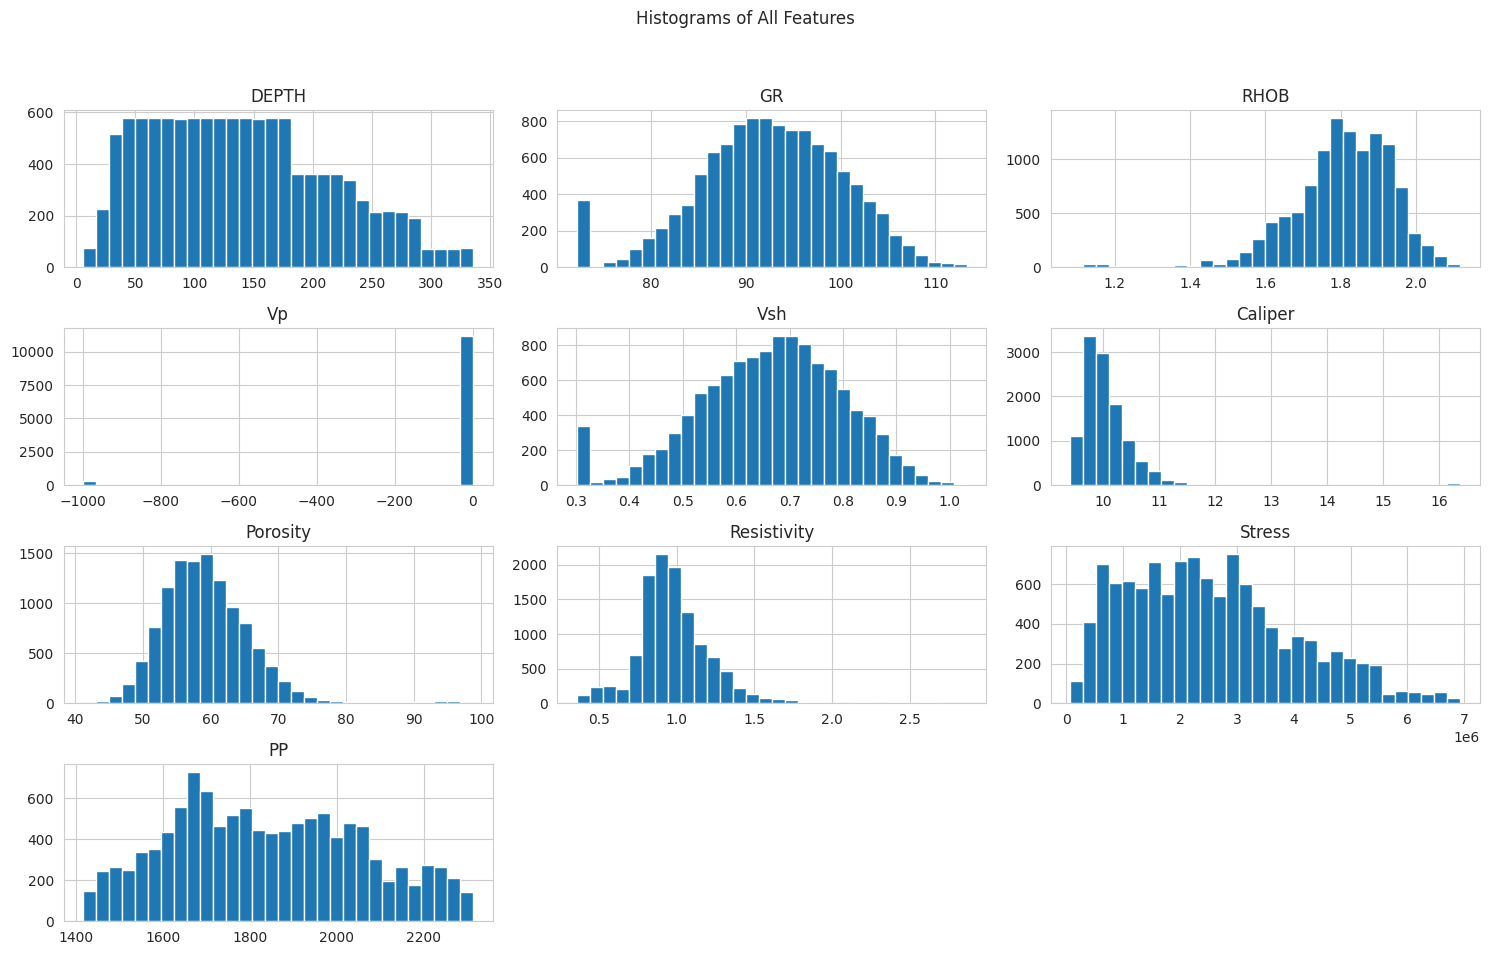

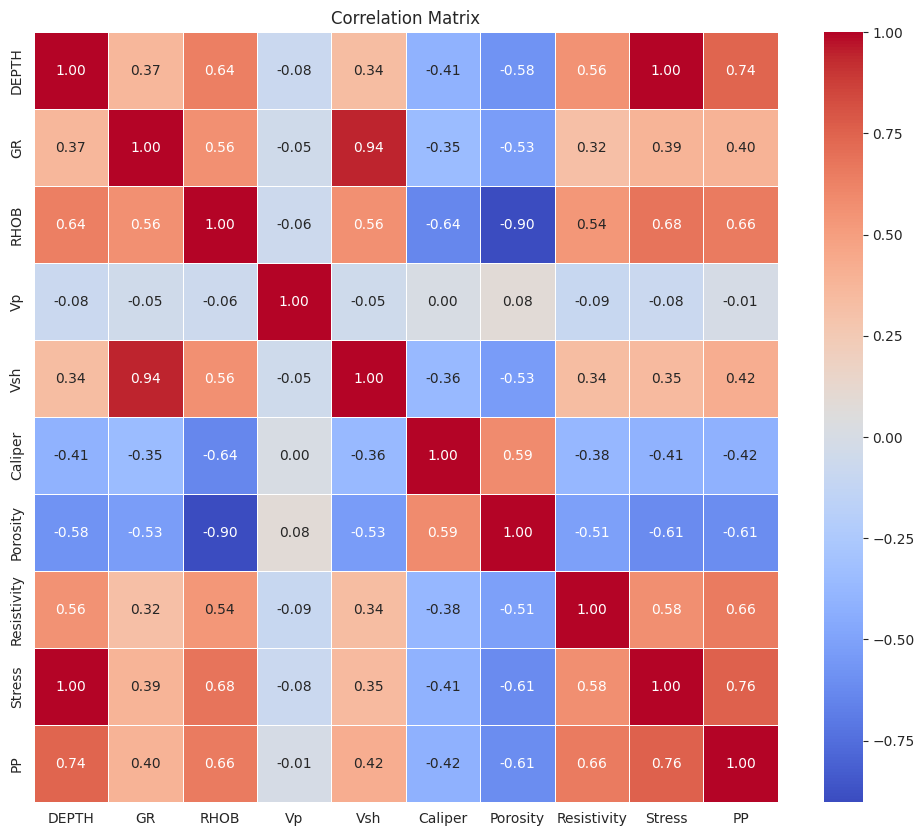


Highly correlated feature pairs (excluding self-correlation):
DEPTH  Stress      0.995482
Vsh    GR          0.942851
RHOB   Porosity    0.902506
dtype: float64


In [ ]:
print("\n--- 2.3. Distribution and Correlation Analysis ---")

# Plotting distributions of all features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Exclude the 'WELL' column from the correlation calculation
correlation_matrix = df.drop('WELL', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Check for high multicollinearity (e.g., > 0.8)
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]
print("\nHighly correlated feature pairs (excluding self-correlation):")
print(high_corr_pairs[high_corr_pairs < 1.0].drop_duplicates())




#**Step 3: Feature Engineering & Preprocessing**

##**3.1. Feature Selection**

--- Data Prepared for Feature Selection ---
Features being evaluated: ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity', 'Resistivity', 'Stress']

--- Method 1: Univariate Selection (SelectKBest with F-test) ---
       Feature       F-Score
8       Stress  15601.809055
0        DEPTH  14304.975367
2         RHOB   8720.290256
7  Resistivity   8636.985304
6     Porosity   6769.377898
4          Vsh   2492.239334
5      Caliper   2429.477020
1           GR   2125.141816
3           Vp      0.758373

--- Method 2: Recursive Feature Elimination (RFE) ---
       Feature  RFE_Rank
8       Stress         1
4          Vsh         2
1           GR         3
7  Resistivity         4
2         RHOB         5
3           Vp         6
6     Porosity         7
0        DEPTH         8
5      Caliper         9

--- Method 3: Feature Importance from Random Forest ---
       Feature  RF_Importance
8       Stress       0.473722
7  Resistivity       0.232932
3           Vp       0.139250
0      

/tmp/ipython-input-9-2082090706.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='F-Score', y='Feature', data=univariate_scores, palette='viridis')
/tmp/ipython-input-9-2082090706.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='RFE_Rank', y='Feature', data=rfe_ranking, palette='plasma')
/tmp/ipython-input-9-2082090706.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='RF_Importance', y='Feature', data=rf_importance, palette='magma')


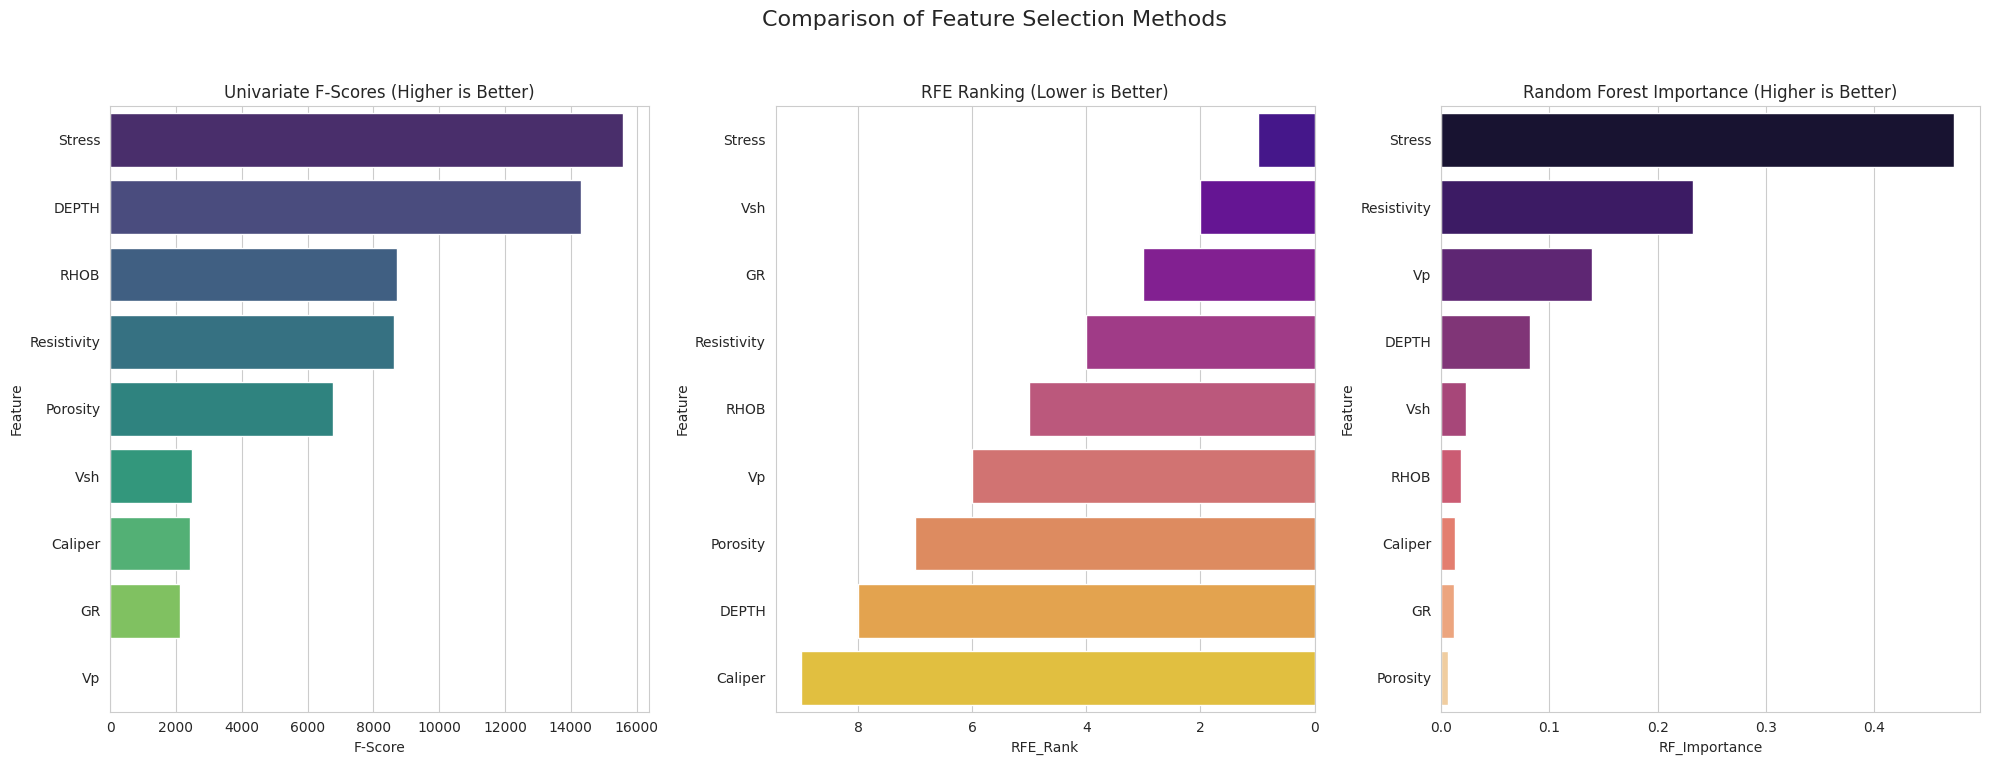

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare Data for Feature Selection ---
# We use the DataFrame after outlier capping but BEFORE we manually removed any columns.
# This ensures all methods evaluate the full original feature set.
# We must drop the categorical 'WELL' column as these methods only work on numerical data.

X_fs = df.drop(columns=['PP', 'WELL'])
y_fs = df['PP']

# It's good practice to scale data for methods involving linear models (like RFE) or distance (like f-test).
scaler_fs = StandardScaler()
X_fs_scaled = scaler_fs.fit_transform(X_fs)
X_fs_scaled = pd.DataFrame(X_fs_scaled, columns=X_fs.columns) # Keep column names

print("--- Data Prepared for Feature Selection ---")
print(f"Features being evaluated: {X_fs.columns.tolist()}\n")


# --- 2. Run and Evaluate Method 1: Univariate Selection ---
print("--- Method 1: Univariate Selection (SelectKBest with F-test) ---")
# We set k='all' to get the scores for every feature, not just a subset.
selector_kbest = SelectKBest(score_func=f_regression, k='all')
selector_kbest.fit(X_fs_scaled, y_fs)

# Create and print a sorted DataFrame of the scores
univariate_scores = pd.DataFrame({
    'Feature': X_fs.columns,
    'F-Score': selector_kbest.scores_
}).sort_values(by='F-Score', ascending=False)
print(univariate_scores)


# --- 3. Run and Evaluate Method 2: Recursive Feature Elimination (RFE) ---
print("\n--- Method 2: Recursive Feature Elimination (RFE) ---")
# We use a simple, fast Linear Regression model as the estimator for RFE.
model_rfe_estimator = LinearRegression()

# Initialize RFE. The ranking_ attribute gives us the full ranking.
rfe = RFE(estimator=model_rfe_estimator, n_features_to_select=1) # n_features_to_select doesn't matter for ranking
rfe.fit(X_fs_scaled, y_fs)

# Create and print a sorted DataFrame of the ranks (1 is the best)
rfe_ranking = pd.DataFrame({
    'Feature': X_fs.columns,
    'RFE_Rank': rfe.ranking_
}).sort_values(by='RFE_Rank', ascending=True)
print(rfe_ranking)


# --- 4. Run and Evaluate Method 3: Embedded Tree-based Importance ---
print("\n--- Method 3: Feature Importance from Random Forest ---")
# We train a Random Forest model on all features.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_fs_scaled, y_fs)

# Create and print a sorted DataFrame of the importance scores
rf_importance = pd.DataFrame({
    'Feature': X_fs.columns,
    'RF_Importance': model_rf.feature_importances_
}).sort_values(by='RF_Importance', ascending=False)
print(rf_importance)


# --- 5. Visualize All Three Methods for Comparison ---
print("\n--- Generating Comparison Plot ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Comparison of Feature Selection Methods', fontsize=16)

# Plot 1: Univariate Selection
sns.barplot(ax=axes[0], x='F-Score', y='Feature', data=univariate_scores, palette='viridis')
axes[0].set_title('Univariate F-Scores (Higher is Better)')

# Plot 2: RFE Ranking
sns.barplot(ax=axes[1], x='RFE_Rank', y='Feature', data=rfe_ranking, palette='plasma')
axes[1].set_title('RFE Ranking (Lower is Better)')
axes[1].invert_xaxis() # Invert axis so 1 is on the right, making longer bars better visually

# Plot 3: Random Forest Importance
sns.barplot(ax=axes[2], x='RF_Importance', y='Feature', data=rf_importance, palette='magma')
axes[2].set_title('Random Forest Importance (Higher is Better)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##**3.2. Data Splitting**

In [ ]:
# This code block finalizes the data preparation with the 70/30 split.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Finalize Feature Selection Based on All Analyses ---
print("--- Finalizing Feature Selection ---")

# Define features to remove based on our comprehensive analysis
features_to_remove = ['DEPTH', 'GR', 'Porosity']

# Create our final feature matrix X and target vector y
X = df.drop(columns=['PP', 'WELL'] + features_to_remove)
y = df['PP']

print(f"Features removed: {features_to_remove}")
print(f"\nFinal features for modeling: {X.columns.tolist()}")


# --- 2. Data Splitting (70/30 Ratio) ---
print("\n--- Applying 70/30 Train-Test Split ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # Set the test size to 30%
    random_state=42 # Keep the random state for reproducibility
)

print(f"Training set shape: {X_train.shape} ({len(X_train)/len(df):.0%})")
print(f"Testing set shape: {X_test.shape} ({len(X_test)/len(df):.0%})")



--- Finalizing Feature Selection ---
Features removed: ['DEPTH', 'GR', 'Porosity']

Final features for modeling: ['RHOB', 'Vp', 'Vsh', 'Caliper', 'Resistivity', 'Stress']

--- Applying 70/30 Train-Test Split ---
Training set shape: (8045, 6) (70%)
Testing set shape: (3449, 6) (30%)


##**3.3. Feature Scaling**

In [ ]:
# --- 3. Feature Scaling ---
print("\n--- Scaling Features ---")
scaler = StandardScaler()

# Fit only on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nData has been split (70/30) and scaled.")
print("We are now ready for model training.")
print("\nFirst 5 rows of the final scaled training data:")
print(X_train_scaled.head())


--- Scaling Features ---

Data has been split (70/30) and scaled.
We are now ready for model training.

First 5 rows of the final scaled training data:
          RHOB        Vp       Vsh   Caliper  Resistivity    Stress
1743 -0.925089  0.167125 -0.304371  1.401792    -0.473633 -0.756753
9616  0.709372  0.167478  1.656578 -0.663915     0.293451 -0.250223
4387  0.379963  0.167458  0.233115 -0.468995     0.525307  1.166953
7983  0.749346  0.167866  1.326770 -0.598092     0.604349  0.565400
4128 -0.434306 -5.977889 -0.154853  0.858789     0.539610  0.526850


#**Step 4: Model Training & Baseline Evaluation**

--- Step 4: Baseline Model Training & Evaluation ---
--- Training Decision Tree ---
--- Training K-Nearest Neighbors ---
--- Training SVR ---
--- Training Random Forest ---
--- Training XGBoost ---

--- Training Artificial Neural Network (ANN) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


--- Baseline Model Performance Comparison ---
                           R2        MAE        RMSE   Time (s)
Random Forest        0.963278  21.770827   42.163666   7.100321
XGBoost              0.954370  30.145614   46.999966   0.326028
K-Nearest Neighbors  0.921674  33.723226   61.578180   0.098419
Decision Tree        0.921030  22.029887   61.830868   0.106342
ANN                  0.800981  75.197214   98.157143  64.685089
SVR                  0.644710  99.278325  131.149245   5.002067


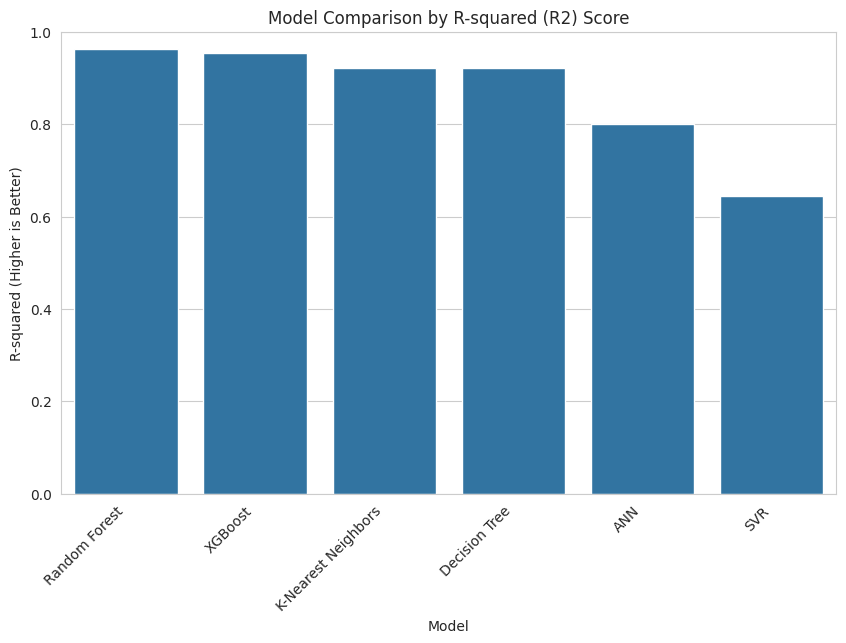

In [ ]:
# --- Core Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# --- Scikit-learn for Models and Metrics ---
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# --- Keras / TensorFlow for ANN ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("--- Step 4: Baseline Model Training & Evaluation ---")

# --- 1. Initialize All Models ---
# We use default parameters for this baseline evaluation.
# We set random_state for reproducibility on models that have it.
# n_jobs=-1 tells the model to use all available CPU cores for faster training.
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_jobs=-1),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1)
}

# --- 2. Train and Evaluate Models in a Loop ---
# Dictionary to store the results
results = {}

for name, model in models.items():
    start_time = time.time()
    print(f"--- Training {name} ---")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    end_time = time.time()
    training_time = end_time - start_time

    # Store results
    results[name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse, 'Time (s)': training_time}

# --- 3. Train and Evaluate the Artificial Neural Network (ANN) ---
print("\n--- Training Artificial Neural Network (ANN) ---")
start_time_ann = time.time()

# Define a simple but solid ANN architecture
ann_model = Sequential([
    # Input layer and first hidden layer. `input_shape` must match the number of features.
    Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    # A dropout layer can help prevent overfitting by randomly setting a fraction of inputs to 0
    Dropout(0.2),
    Dense(32, activation='relu'),
    # The output layer for a regression problem is a single neuron with no activation function.
    Dense(1)
])

# Compile the model
# Adam is a great general-purpose optimizer. We track Mean Squared Error as our loss function.
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Use EarlyStopping to automatically stop training when the model performance on a validation
# set stops improving. This is a crucial technique to prevent overfitting.
# 'patience=10' means we'll wait for 10 epochs with no improvement before stopping.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
# We use a portion of the training data (20%) as a validation set for early stopping.
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200, # Set a high number of epochs; early stopping will find the optimal number.
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0 # Set to 1 if you want to see the training progress for each epoch
)

# Evaluate the ANN on the test set
y_pred_ann = ann_model.predict(X_test_scaled).flatten() # flatten converts the output to a 1D array
mae_ann = mean_absolute_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
r2_ann = r2_score(y_test, y_pred_ann)
end_time_ann = time.time()
training_time_ann = end_time_ann - start_time_ann

results['ANN'] = {'R2': r2_ann, 'MAE': mae_ann, 'RMSE': rmse_ann, 'Time (s)': training_time_ann}


# --- 4. Display Final Results ---
# Convert the results dictionary to a pandas DataFrame for nice formatting
results_df = pd.DataFrame(results).T

# Sort the results by R-squared score in descending order
results_df = results_df.sort_values(by='R2', ascending=False)

print("\n\n--- Baseline Model Performance Comparison ---")
print(results_df)


# --- 5. Visualize the Results ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('Model Comparison by R-squared (R2) Score')
plt.xlabel('Model')
plt.ylabel('R-squared (Higher is Better)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # R2 score is between 0 and 1
plt.show()

##**4.1. Diagnostic Plots for Baseline Models**

--- Generating Diagnostic Plots for ALL BASELINE Models (Corrected) ---
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


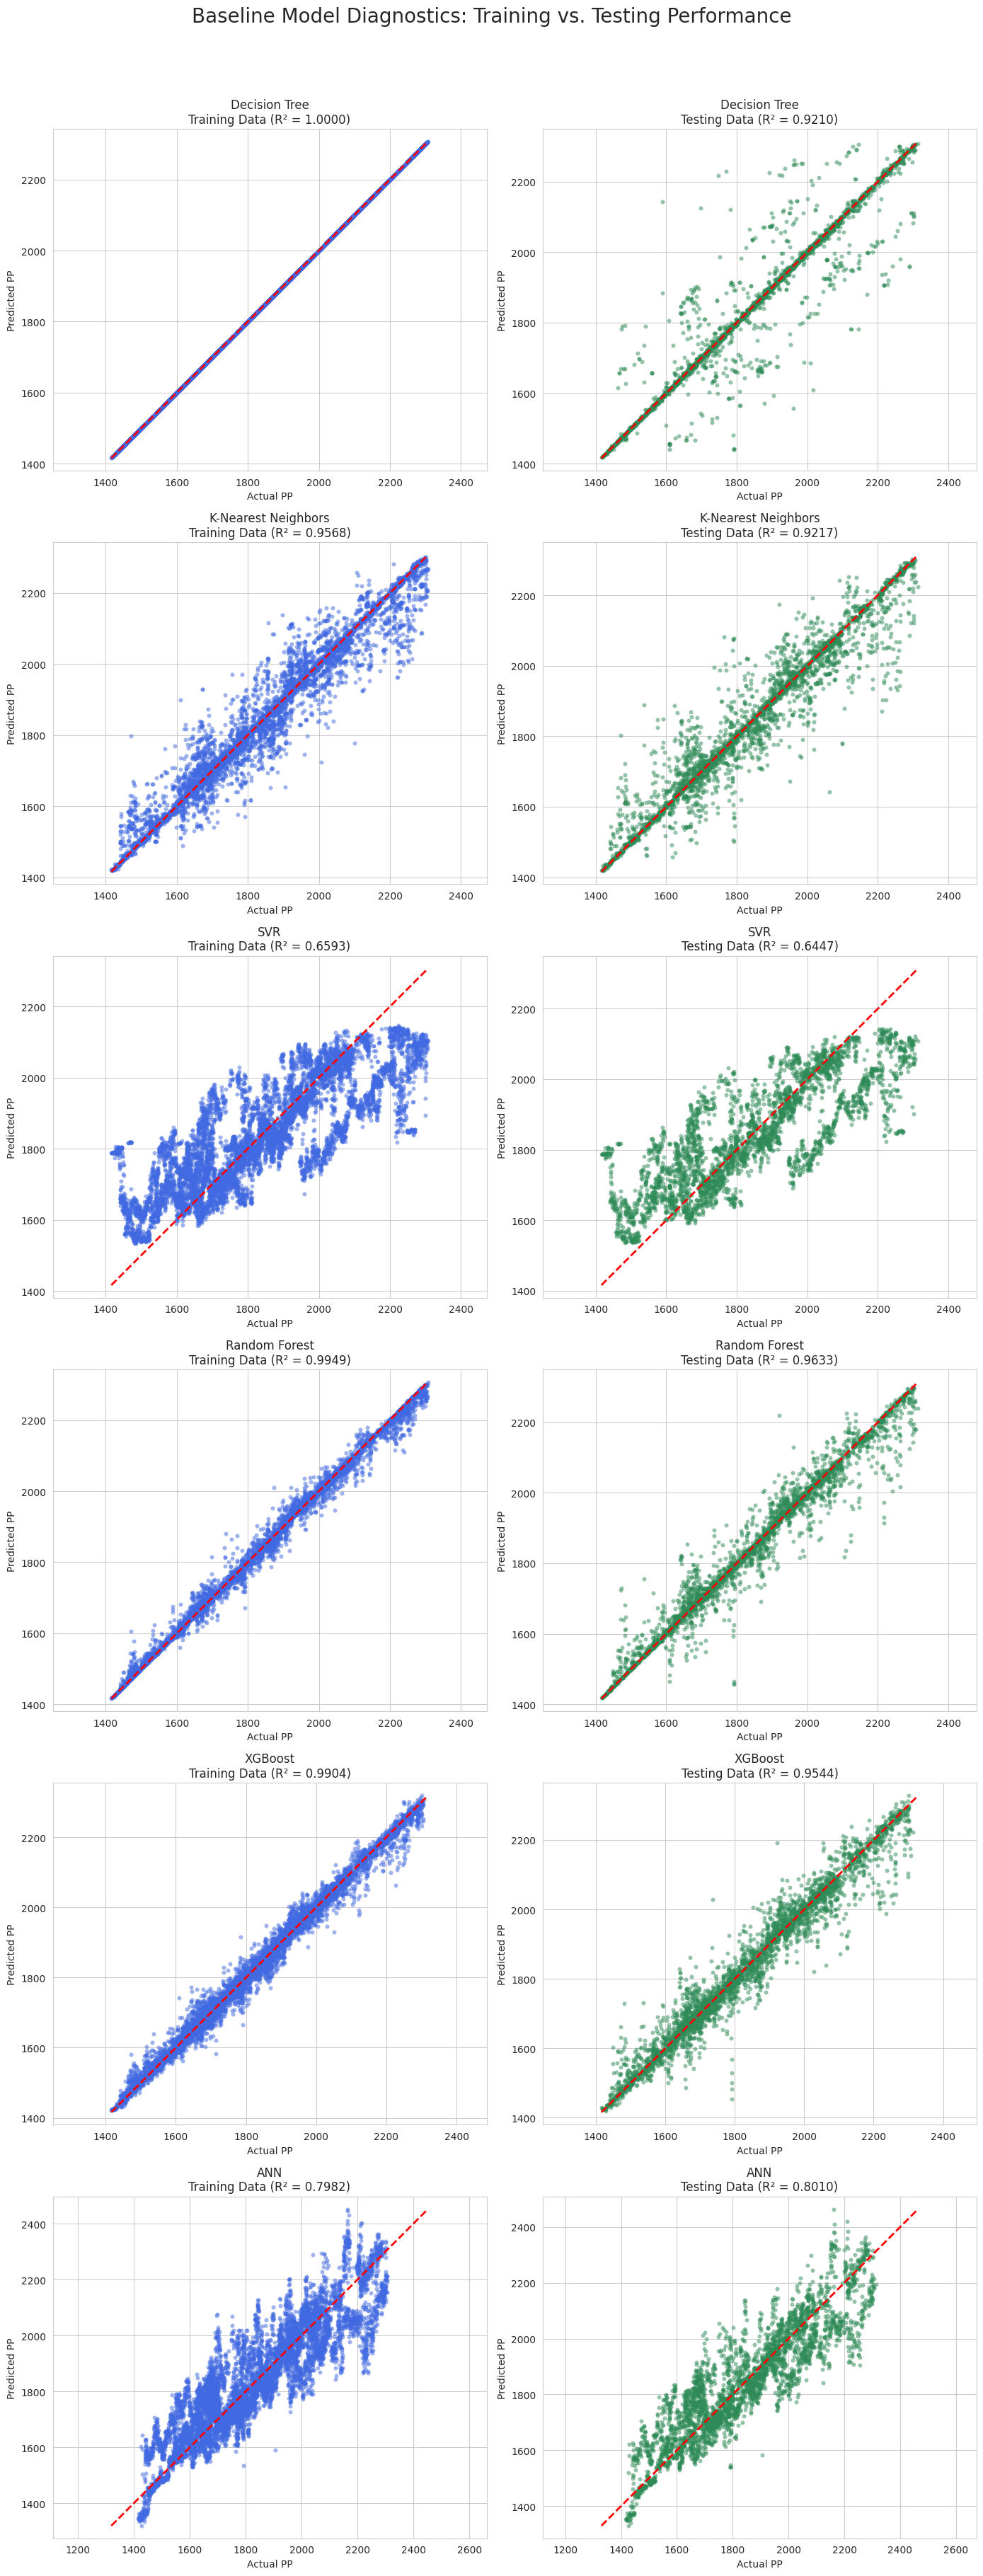

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print("--- Generating Diagnostic Plots for ALL BASELINE Models (Corrected) ---")

# --- 1. Ensure the baseline ANN is included in our models dictionary ---
# This assumes 'ann_model' is the variable holding your trained baseline ANN
# and 'models' is the dictionary holding the other baseline models.
if 'ANN' not in models and 'ann_model' in locals():
    models['ANN'] = ann_model

# --- 2. Create a 6x2 subplot grid ---
# 6 rows (one for each model), 2 columns (Train vs. Test)
fig, axes = plt.subplots(len(models), 2, figsize=(14, 36))
fig.suptitle('Baseline Model Diagnostics: Training vs. Testing Performance', fontsize=20, y=1.01)

# --- 3. Loop through each model and generate its plots ---
for i, (name, model) in enumerate(models.items()):
    # --- Special handling for ANN vs. Scikit-learn models ---
    if name == 'ANN':
        # Keras models return a 2D array, so we flatten it
        y_pred_train = model.predict(X_train_scaled).flatten()
        y_pred_test = model.predict(X_test_scaled).flatten()
    else:
        # Scikit-learn models return a 1D array by default
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Calculate R2 scores on the fly
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # --- Plot for Training Data (Left Column) ---
    ax_train = axes[i, 0]
    sns.scatterplot(ax=ax_train, x=y_train, y=y_pred_train, alpha=0.5, s=15, color='royalblue', edgecolor=None)
    ax_train.set_title(f'{name}\nTraining Data (R² = {train_r2:.4f})')
    ax_train.set_xlabel('Actual PP')
    ax_train.set_ylabel('Predicted PP')
    # Add the 45-degree reference line
    min_val_train = min(y_train.min(), y_pred_train.min())
    max_val_train = max(y_train.max(), y_pred_train.max())
    ax_train.plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', lw=2)
    ax_train.axis('equal')

    # --- Plot for Testing Data (Right Column) ---
    ax_test = axes[i, 1]
    sns.scatterplot(ax=ax_test, x=y_test, y=y_pred_test, alpha=0.5, s=15, color='seagreen', edgecolor=None)
    ax_test.set_title(f'{name}\nTesting Data (R² = {test_r2:.4f})')
    ax_test.set_xlabel('Actual PP')
    ax_test.set_ylabel('Predicted PP')
    # Add the 45-degree reference line
    min_val_test = min(y_test.min(), y_pred_test.min())
    max_val_test = max(y_test.max(), y_pred_test.max())
    ax_test.plot([min_val_test, max_val_test], [min_val_test, max_val_test], 'r--', lw=2)
    ax_test.axis('equal')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.99]) # Adjust rect to ensure suptitle fits
plt.show()

##**4.2. Loss Curve for ANN**


--- Plotting ANN Training and Validation Loss Curve ---


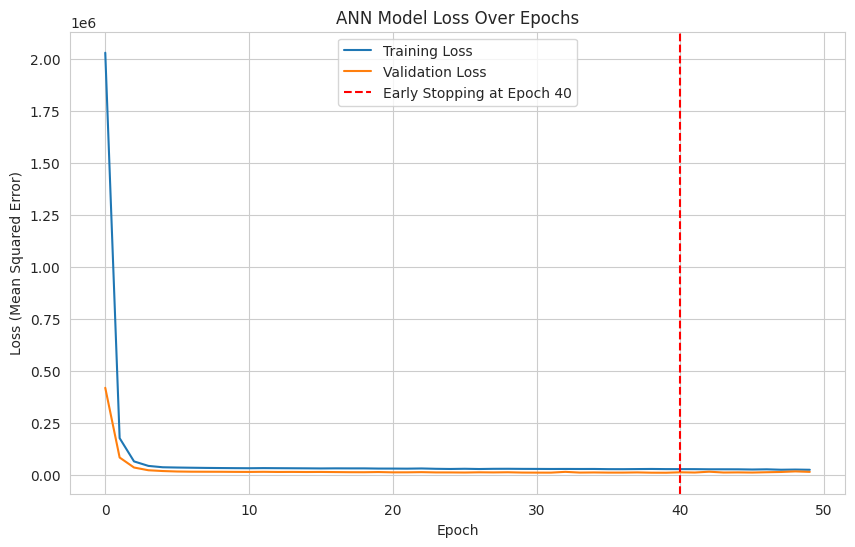

In [ ]:
# The 'history' object was returned by the ann_model.fit() call

# Check if the history object has the required keys
if 'loss' in history.history and 'val_loss' in history.history:
    print("\n--- Plotting ANN Training and Validation Loss Curve ---")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('ANN Model Loss Over Epochs')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.xlabel('Epoch')
    plt.legend()
    # Let's add a vertical line showing where Early Stopping kicked in
    # The 'best' epoch is the one with the lowest validation loss
    best_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Early Stopping at Epoch {best_epoch}')
    plt.legend()
    plt.show()
else:
    print("\nCould not generate loss curve: 'loss' or 'val_loss' not found in history object.")

#**Step 5: Hyperparameter Tuning**

##**5.1. RF Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

print("--- Step 5: Hyperparameter Tuning ---")
print("\n--- Part 1: Tuning Random Forest ---")

# 1. Define the parameter grid for Random Forest
# These are some of the most important hyperparameters to tune.
param_dist_rf = {
    # n_estimators: The number of trees in the forest.
    'n_estimators': [100, 200, 300, 500, 700],
    # max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns but can also overfit.
    'max_depth': [10, 20, 30, 40, None], # None means nodes are expanded until all leaves are pure.
    # min_samples_split: The minimum number of samples required to split an internal node.
    'min_samples_split': [2, 5, 10],
    # min_samples_leaf: The minimum number of samples required to be at a leaf node.
    'min_samples_leaf': [1, 2, 4],
    # max_features: The number of features to consider when looking for the best split.
    'max_features': ['sqrt', 'log2', 1.0], # 1.0 is equivalent to 'auto' for regressors
    # bootstrap: Whether bootstrap samples are used when building trees.
    'bootstrap': [True, False]
}

# 2. Instantiate RandomizedSearchCV
# We create a base Random Forest model to be tuned.
rf_base = RandomForestRegressor(random_state=42)

# Set up the random search with 5-fold cross-validation
# n_iter=50: It will try 50 different random combinations of parameters.
# cv=5: It will use 5-fold cross-validation for each combination.
# scoring='neg_mean_squared_error': We optimize by minimizing MSE. Sklearn maximizes, so we maximize negative MSE.
# n_jobs=-1: Use all available CPU cores.
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    verbose=1, # Set to 2 to see more details
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 3. Fit the random search to the data
print("Starting Randomized Search for Random Forest... (This may take a few minutes)")
start_time_rf_tune = time.time()
rf_random_search.fit(X_train_scaled, y_train)
end_time_rf_tune = time.time()

print(f"Random Forest tuning finished in {end_time_rf_tune - start_time_rf_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Parameters found for Random Forest:")
print(rf_random_search.best_params_)
best_rf_model = rf_random_search.best_estimator_

--- Step 5: Hyperparameter Tuning ---

--- Part 1: Tuning Random Forest ---
Starting Randomized Search for Random Forest... (This may take a few minutes)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest tuning finished in 2486.29 seconds.

Best Parameters found for Random Forest:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


##**5.2. XGBoost Tuning**

In [ ]:
print("\n\n--- Part 2: Tuning XGBoost ---")

# 1. Define the parameter grid for XGBoost
param_dist_xgb = {
    # n_estimators: The number of boosting rounds (trees).
    'n_estimators': [100, 200, 300, 500, 700],
    # learning_rate (eta): Step size shrinkage to prevent overfitting. Lower is generally more robust.
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    # max_depth: Maximum depth of a tree.
    'max_depth': [3, 5, 7, 10],
    # subsample: Fraction of observations to be randomly sampled for each tree.
    'subsample': [0.7, 0.8, 0.9, 1.0],
    # colsample_bytree: Fraction of columns to be randomly sampled for each tree.
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    # gamma: Minimum loss reduction required to make a further partition on a leaf node.
    'gamma': [0, 0.1, 0.2]
}

# 2. Instantiate RandomizedSearchCV
xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 3. Fit the random search to the data
print("Starting Randomized Search for XGBoost... (This may take a few minutes)")
start_time_xgb_tune = time.time()
xgb_random_search.fit(X_train_scaled, y_train)
end_time_xgb_tune = time.time()
print(f"XGBoost tuning finished in {end_time_xgb_tune - start_time_xgb_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Parameters found for XGBoost:")
print(xgb_random_search.best_params_)
best_xgb_model = xgb_random_search.best_estimator_



--- Part 2: Tuning XGBoost ---
Starting Randomized Search for XGBoost... (This may take a few minutes)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost tuning finished in 270.35 seconds.

Best Parameters found for XGBoost:
{'subsample': 0.8, 'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


##**5.3. Decision Tree Tuning**

In [ ]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

print("\n\n--- Part 3: Tuning Decision Tree ---")

# 1. Define the parameter grid for Decision Tree
# Key is to control the tree's complexity to prevent overfitting.
param_dist_dt = {
    # max_depth: Controls the maximum depth of the tree.
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    # min_samples_split: Minimum samples to split a node. Higher values prevent overfitting on noise.
    'min_samples_split': [2, 5, 10, 15, 20],
    # min_samples_leaf: Minimum samples required in a leaf. Smooths the model.
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    # max_features: Number of features to consider for a split.
    'max_features': ['sqrt', 'log2', None] # None means all features
}

# 2. Instantiate RandomizedSearchCV
dt_base = DecisionTreeRegressor(random_state=42)

dt_random_search = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 3. Fit the random search to the data
print("Starting Randomized Search for Decision Tree...")
start_time_dt_tune = time.time()
dt_random_search.fit(X_train_scaled, y_train)
end_time_dt_tune = time.time()
print(f"Decision Tree tuning finished in {end_time_dt_tune - start_time_dt_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Parameters found for Decision Tree:")
print(dt_random_search.best_params_)
best_dt_model = dt_random_search.best_estimator_



--- Part 3: Tuning Decision Tree ---
Starting Randomized Search for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree tuning finished in 8.88 seconds.

Best Parameters found for Decision Tree:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}


##**5.4. SVR Tuning**

In [ ]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

print("\n\n--- Part 4: Tuning Support Vector Regressor (SVR) ---")

# 1. Define the parameter grid for SVR
# C and gamma are the most critical. We use a logarithmic distribution
# for C and gamma as their impact is often on an order-of-magnitude scale.
param_dist_svr = {
    # C: Regularization parameter. The strength of the regularization is inversely proportional to C.
    'C': loguniform(1, 1000), # Search for C in a log-uniform distribution between 1 and 1000
    # gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'gamma': loguniform(0.001, 1), # Search for gamma in a log-uniform distribution
    # kernel: We will focus on the 'rbf' kernel as it's the most powerful and common.
    'kernel': ['rbf']
}

# 2. Instantiate RandomizedSearchCV
svr_base = SVR()

svr_random_search = RandomizedSearchCV(
    estimator=svr_base,
    param_distributions=param_dist_svr,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 3. Fit the random search to the data
print("Starting Randomized Search for SVR... (This may be slow)")
start_time_svr_tune = time.time()
svr_random_search.fit(X_train_scaled, y_train)
end_time_svr_tune = time.time()
print(f"SVR tuning finished in {end_time_svr_tune - start_time_svr_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Parameters found for SVR:")
print(svr_random_search.best_params_)
best_svr_model = svr_random_search.best_estimator_



--- Part 4: Tuning Support Vector Regressor (SVR) ---
Starting Randomized Search for SVR... (This may be slow)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
SVR tuning finished in 847.80 seconds.

Best Parameters found for SVR:
{'C': np.float64(658.4106160121607), 'gamma': np.float64(0.4835952776465949), 'kernel': 'rbf'}


##**5.5. KNN Tuning**

In [ ]:
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

print("\n\n--- Part 5: Tuning K-Nearest Neighbors (KNN) ---")

# 1. Define the parameter grid for KNN
param_dist_knn = {
    # n_neighbors: The number of neighbors to use (K).
    'n_neighbors': list(range(1, 31)), # Test K from 1 to 30
    # weights: Weight function used in prediction. 'distance' often performs better than 'uniform'.
    'weights': ['uniform', 'distance'],
    # p: Power parameter for the Minkowski metric. 1 is manhattan_distance, 2 is euclidean_distance.
    'p': [1, 2]
}

# 2. Instantiate RandomizedSearchCV
knn_base = KNeighborsRegressor(n_jobs=-1)

# For KNN, the number of combinations is small (30*2*2=120).
# Instead of a random search, we can test all combinations with GridSearchCV.
# However, to keep the format, we'll use RandomizedSearch but set n_iter high enough.
knn_random_search = RandomizedSearchCV(
    estimator=knn_base,
    param_distributions=param_dist_knn,
    n_iter=50, # Try 50 of the 120 possible combinations
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 3. Fit the random search to the data
print("Starting Randomized Search for KNN...")
start_time_knn_tune = time.time()
knn_random_search.fit(X_train_scaled, y_train)
end_time_knn_tune = time.time()
print(f"KNN tuning finished in {end_time_knn_tune - start_time_knn_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Parameters found for KNN:")
print(knn_random_search.best_params_)
best_knn_model = knn_random_search.best_estimator_



--- Part 5: Tuning K-Nearest Neighbors (KNN) ---
Starting Randomized Search for KNN...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
KNN tuning finished in 19.06 seconds.

Best Parameters found for KNN:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}


##**5.6. ANN Tuning**

In [ ]:
# First, ensure KerasTuner is installed
!pip install -q -U keras-tuner


import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt


print("\n\n--- Part 6: Tuning Artificial Neural Network (ANN) ---")

# 1. Define the model-building function for the tuner
def build_ann_model(hp):
    model = Sequential()

    # Tune the number of units in the first hidden layer
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units_1, activation='relu', input_shape=[X_train_scaled.shape[1]]))

    # Tune the dropout rate
    hp_dropout_1 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout_1))

    # Tune the number of hidden layers (from 1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        hp_units_layer = hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32)
        model.add(Dense(units=hp_units_layer, activation='relu'))

    # Output layer
    model.add(Dense(1))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mean_squared_error'
    )
    return model

# 2. Instantiate the tuner
# We use RandomSearch for speed. max_trials=15 is a reasonable number for a fast search.
tuner = kt.RandomSearch(
    build_ann_model,
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1, # Set to 1 for speed, 2 for more robustness
    directory='ann_tuning_fast',
    project_name='PorePressure'
)

# Define an EarlyStopping callback to stop training when validation loss stops improving.
# This is crucial for speed, as it prevents wasting time on unpromising trials.
stop_early = EarlyStopping(monitor='val_loss', patience=10)

# 3. Fit the tuner to the data
print("Starting Randomized Search for ANN... (This may take a few minutes)")
start_time_ann_tune = time.time()
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early], verbose=1)
end_time_ann_tune = time.time()
print(f"ANN tuning finished in {end_time_ann_tune - start_time_ann_tune:.2f} seconds.")

# 4. Get the best model
print("\nBest Hyperparameters found for ANN:")
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

# Build the model with the best HPs and train it on the full training data
best_ann_model = tuner.hypermodel.build(best_hps)
# We would typically retrain it here on the full training data before evaluation.
# history = best_ann_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

Trial 15 Complete [00h 00m 55s]
val_loss: 11386.3251953125

Best val_loss So Far: 6272.4150390625
Total elapsed time: 00h 14m 04s
ANN tuning finished in 843.56 seconds.

Best Hyperparameters found for ANN:
{'units_1': 96, 'dropout_1': 0.30000000000000004, 'num_layers': 3, 'units_2': 96, 'learning_rate': 0.001, 'units_3': 96, 'units_4': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#**Step 6: Final Evaluation of All Tuned Models**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# It's good practice to have a final dictionary for all results,
# assuming 'results' dictionary from baseline training already exists.
# If not, create it:
# results = {}

print("\n\n--- Step 6: Evaluating All Tuned Models on Test Set ---")

# --- Evaluate Tuned Random Forest ---
print("Evaluating Tuned Random Forest...")
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
results['Random Forest (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_rf_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_rf_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)),
    'Time (s)': end_time_rf_tune - start_time_rf_tune
}

# --- Evaluate Tuned XGBoost ---
print("Evaluating Tuned XGBoost...")
y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)
results['XGBoost (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_xgb_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_xgb_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)),
    'Time (s)': end_time_xgb_tune - start_time_xgb_tune
}

# --- Evaluate Tuned Decision Tree ---
print("Evaluating Tuned Decision Tree...")
y_pred_dt_tuned = best_dt_model.predict(X_test_scaled)
results['Decision Tree (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_dt_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_dt_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned)),
    'Time (s)': end_time_dt_tune - start_time_dt_tune
}

# --- Evaluate Tuned SVR ---
print("Evaluating Tuned SVR...")
y_pred_svr_tuned = best_svr_model.predict(X_test_scaled)
results['SVR (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_svr_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_svr_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr_tuned)),
    'Time (s)': end_time_svr_tune - start_time_svr_tune
}

# --- Evaluate Tuned KNN ---
print("Evaluating Tuned KNN...")
y_pred_knn_tuned = best_knn_model.predict(X_test_scaled)
results['KNN (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_knn_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_knn_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_tuned)),
    'Time (s)': end_time_knn_tune - start_time_knn_tune
}

# --- Evaluate Tuned ANN ---
# For the ANN, we need to retrain the best model on the full training data before evaluation.
# This ensures it learns from all available training examples.
print("Retraining best ANN model on full training data before evaluation...")
stop_early = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = best_ann_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2, # Still use a validation split to monitor for overfitting
    callbacks=[stop_early],
    verbose=0 # No need to print epoch progress
)

print("Evaluating Tuned ANN...")
y_pred_ann_tuned = best_ann_model.predict(X_test_scaled).flatten()
results['ANN (Tuned)'] = {
    'R2': r2_score(y_test, y_pred_ann_tuned),
    'MAE': mean_absolute_error(y_test, y_pred_ann_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ann_tuned)),
    'Time (s)': end_time_ann_tune - start_time_ann_tune
}


# --- Final Comprehensive Comparison Table ---
# Create a DataFrame from the results dictionary
final_results_df = pd.DataFrame(results).T

# Define the desired order for the final table, grouping baseline and tuned models together
model_order = [
    'Random Forest', 'Random Forest (Tuned)',
    'XGBoost', 'XGBoost (Tuned)',
    'KNN', 'KNN (Tuned)',
    'SVR', 'SVR (Tuned)',
    'Decision Tree', 'Decision Tree (Tuned)',
    'ANN', 'ANN (Tuned)'
]

# Reindex the DataFrame to match the desired order and drop any models not found
# This handles cases where you might not have run the baseline for all models
final_comparison = final_results_df.reindex(model_order).dropna()

# Format the numbers for better readability
final_comparison = final_comparison.style.format({
    "R2": "{:.4f}",
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "Time (s)": "{:.2f}"
}).background_gradient(
    cmap='viridis',
    subset=['R2']
).background_gradient(
    cmap='plasma_r', # _r reverses the colormap, so smaller is better
    subset=['MAE', 'RMSE']
)

print("\n\n--- Final Model Performance: Baseline vs. Tuned ---")
# Display the styled DataFrame
final_comparison



--- Step 6: Evaluating All Tuned Models on Test Set ---
Evaluating Tuned Random Forest...
Evaluating Tuned XGBoost...
Evaluating Tuned Decision Tree...
Evaluating Tuned SVR...
Evaluating Tuned KNN...
Retraining best ANN model on full training data before evaluation...
Evaluating Tuned ANN...
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


--- Final Model Performance: Baseline vs. Tuned ---


,R2,MAE,RMSE,Time (s)
Random Forest,0.9633,21.77,42.16,7.10
Random Forest (Tuned),0.9652,23.38,41.03,2486.29
XGBoost,0.9544,30.15,47.00,0.33
XGBoost (Tuned),0.9702,20.39,38.00,270.35
KNN (Tuned),0.9378,25.45,54.89,19.06
SVR,0.6447,99.28,131.15,5.00
SVR (Tuned),0.8990,44.47,69.91,847.80
Decision Tree,0.9210,22.03,61.83,0.11
Decision Tree (Tuned),0.9244,22.70,60.48,8.88
ANN,0.8010,75.20,98.16,64.69


##**6.1. Diagnostic Plots for Tuned Models**



--- Generating Diagnostic Plots for TUNED Models ---
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


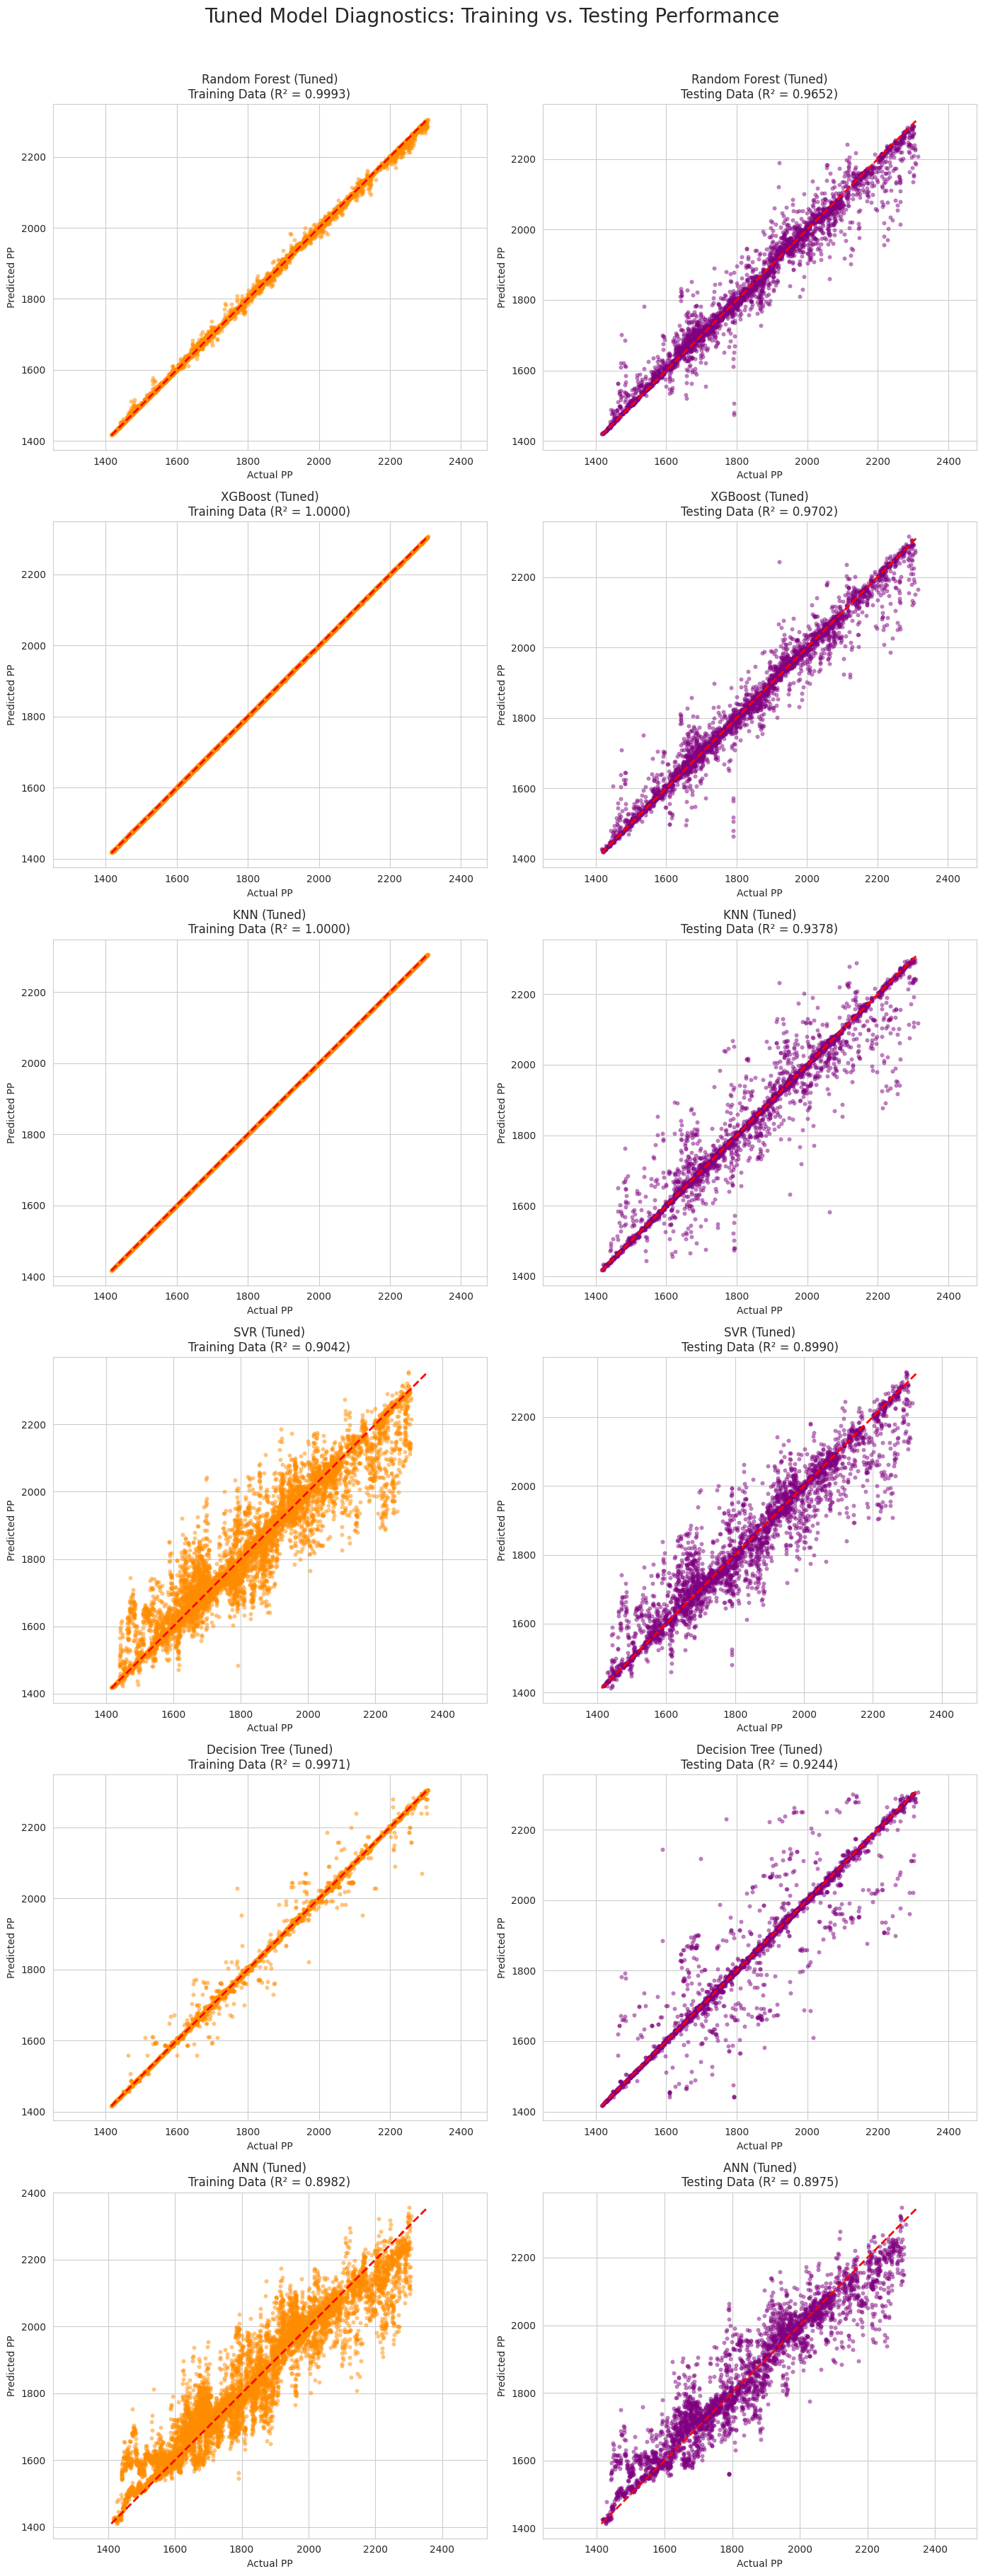

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print("\n\n--- Generating Diagnostic Plots for TUNED Models ---")

# --- 1. Define the TUNED models we want to visualize ---
# This dictionary collects all the 'best_estimator_' objects from your tuning step.
tuned_models_to_evaluate = {
    'Random Forest (Tuned)': best_rf_model,
    'XGBoost (Tuned)': best_xgb_model,
    'KNN (Tuned)': best_knn_model,
    'SVR (Tuned)': best_svr_model,
    'Decision Tree (Tuned)': best_dt_model,
    'ANN (Tuned)': best_ann_model
}

# --- 2. Create a 6x2 subplot grid ---
fig, axes = plt.subplots(len(tuned_models_to_evaluate), 2, figsize=(14, 36))
fig.suptitle('Tuned Model Diagnostics: Training vs. Testing Performance', fontsize=20, y=1.01)

# --- 3. Loop through each model and generate its plots ---
for i, (name, model) in enumerate(tuned_models_to_evaluate.items()):
    # Handle ANN's slightly different prediction output shape
    if name == 'ANN (Tuned)':
        y_pred_train = model.predict(X_train_scaled).flatten()
        y_pred_test = model.predict(X_test_scaled).flatten()
    else:
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Calculate R2 scores on the fly
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # --- Plot for Training Data (Left Column) ---
    ax_train = axes[i, 0]
    sns.scatterplot(ax=ax_train, x=y_train, y=y_pred_train, alpha=0.5, s=15, color='darkorange', edgecolor=None)
    ax_train.set_title(f'{name}\nTraining Data (R² = {train_r2:.4f})')
    ax_train.set_xlabel('Actual PP')
    ax_train.set_ylabel('Predicted PP')
    min_val_train = min(y_train.min(), y_pred_train.min())
    max_val_train = max(y_train.max(), y_pred_train.max())
    ax_train.plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', lw=2)
    ax_train.axis('equal')

    # --- Plot for Testing Data (Right Column) ---
    ax_test = axes[i, 1]
    sns.scatterplot(ax=ax_test, x=y_test, y=y_pred_test, alpha=0.5, s=15, color='purple', edgecolor=None)
    ax_test.set_title(f'{name}\nTesting Data (R² = {test_r2:.4f})')
    ax_test.set_xlabel('Actual PP')
    ax_test.set_ylabel('Predicted PP')
    min_val_test = min(y_test.min(), y_pred_test.min())
    max_val_test = max(y_test.max(), y_pred_test.max())
    ax_test.plot([min_val_test, max_val_test], [min_val_test, max_val_test], 'r--', lw=2)
    ax_test.axis('equal')

plt.tight_layout()
plt.show()

##**6.2. Plotting the Learning Curve for the Tuned ANN**

--- 1. Generating Learning Curve for the Tuned ANN ---
ANN's best performance was at epoch 110 with a validation loss of 4986.9883


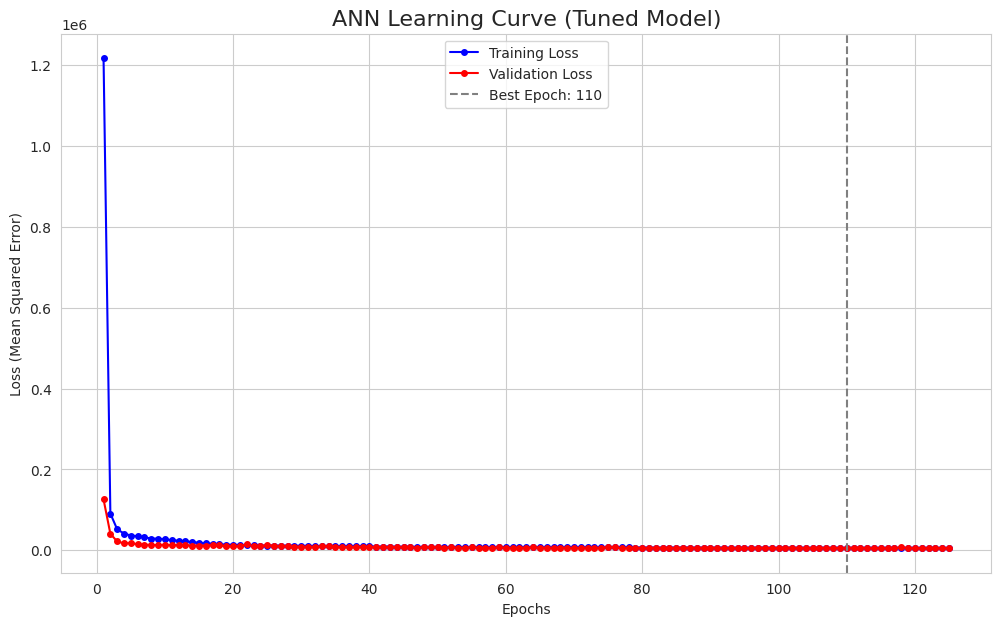

In [ ]:
import matplotlib.pyplot as plt

print("--- 1. Generating Learning Curve for the Tuned ANN ---")

# The 'history' object was created when we trained the final tuned ANN.
# It contains the training and validation loss for each epoch.

# Check if the history object exists
if 'history' in locals() and isinstance(history.history, dict) and 'loss' in history.history:
    # Extracting the loss values
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    # Plotting the curves
    plt.figure(figsize=(12, 7))
    plt.plot(epochs, train_loss, 'b-o', label='Training Loss', markersize=4)
    plt.plot(epochs, val_loss, 'r-o', label='Validation Loss', markersize=4)
    plt.title('ANN Learning Curve (Tuned Model)', fontsize=16)
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Mean Squared Error)')

    # Find the epoch with the minimum validation loss to highlight it
    min_val_loss_epoch = np.argmin(val_loss) + 1
    min_val_loss_value = np.min(val_loss)
    plt.axvline(x=min_val_loss_epoch, color='gray', linestyle='--', label=f'Best Epoch: {min_val_loss_epoch}')
    print(f"ANN's best performance was at epoch {min_val_loss_epoch} with a validation loss of {min_val_loss_value:.4f}")

    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Could not find the 'history' object for the ANN. Please ensure the final ANN training step was run.")